In [114]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
import joblib

In [48]:
df= pd.read_csv('titanic.csv')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [50]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [51]:
df['SibSp'].unique()

array([0, 1, 2, 3, 4, 5, 8])

In [52]:
df['Parch'].unique()

array([0, 1, 3, 2, 4, 6, 5, 9])

In [53]:
df['Family_Size']= df['SibSp']+df['Parch']+1

In [54]:
df['Family_Size'].unique()

array([ 1,  2,  3,  5,  4,  6,  8,  7, 11])

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
 12  Family_Size  418 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 42.6+ KB


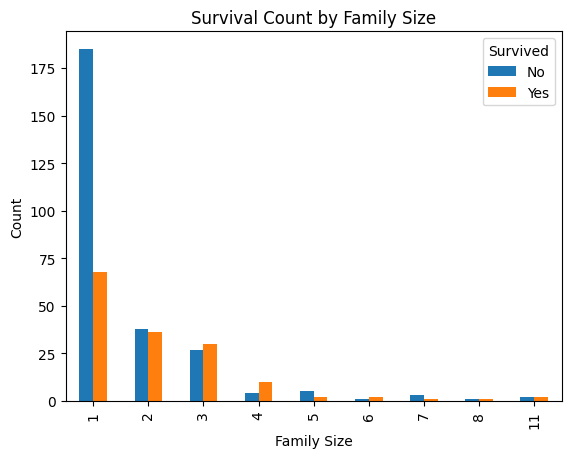

In [56]:
family_survival_counts = df.groupby(['Family_Size', 'Survived']).size().unstack()

family_survival_counts.plot(kind='bar', stacked=False)
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.title('Survival Count by Family Size')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [57]:
df['Cabin'].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [58]:
df['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [59]:
df['Pclass'].unique()

array([3, 2, 1])

In [60]:
df.drop(['Cabin','Ticket','Name','Age'], axis=1, inplace=True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    object 
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
 8   Family_Size  418 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 29.5+ KB


In [62]:
fare_means = df.groupby(['Pclass', 'Embarked'])['Fare'].mean()

In [63]:
def fill_missing_fare(row):
    if pd.isnull(row['Fare']):
        return fare_means.loc[row['Pclass'], row['Embarked']]
    else:
        return row['Fare']

df['Fare'] = df.apply(fill_missing_fare, axis=1)

In [64]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}).astype(float)
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(float)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    float64
 8   Family_Size  418 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 29.5 KB


In [67]:
X = df.drop(columns=['Survived'])
Y = df['Survived']

In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [70]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (334, 8)
X_test shape: (84, 8)
Y_train shape: (334,)
Y_test shape: (84,)


In [107]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [108]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, Y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

best_knn = grid_search.best_estimator_
Y_pred = best_knn.predict(X_test)
print("Classification report:\n", classification_report(Y_test, Y_pred))

Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 9, 'p': 1}
Best cross-validation score: 1.00
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [109]:
knn = KNeighborsClassifier(n_neighbors=9,p=1,metric='manhattan')
knn.fit(X_train,Y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=9, p=1)

In [110]:
Y_pred = knn.predict(X_test)

In [104]:
Y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [111]:
accuracy = knn.score(X_test,Y_test,sample_weight=None)
print("The accuracy is: ",round(accuracy*100,3),"%")

The accuracy is:  100.0 %


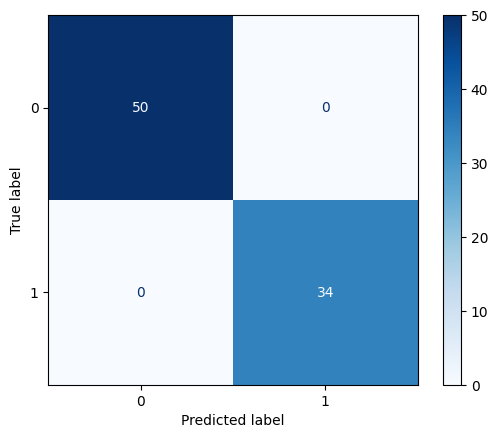

In [112]:
confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)

In [115]:
joblib.dump(knn, 'knn_model.pkl')

['knn_model.pkl']